In [1]:
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model

X_test = np.load('X_test.npy')

print("loading model")
model = load_model("full_model_onMyData.mnist")
model.summary()

print(X_test.shape)

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1


Using TensorFlow backend.


loading model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 43, 43, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272 

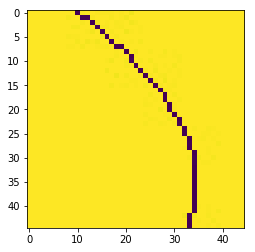

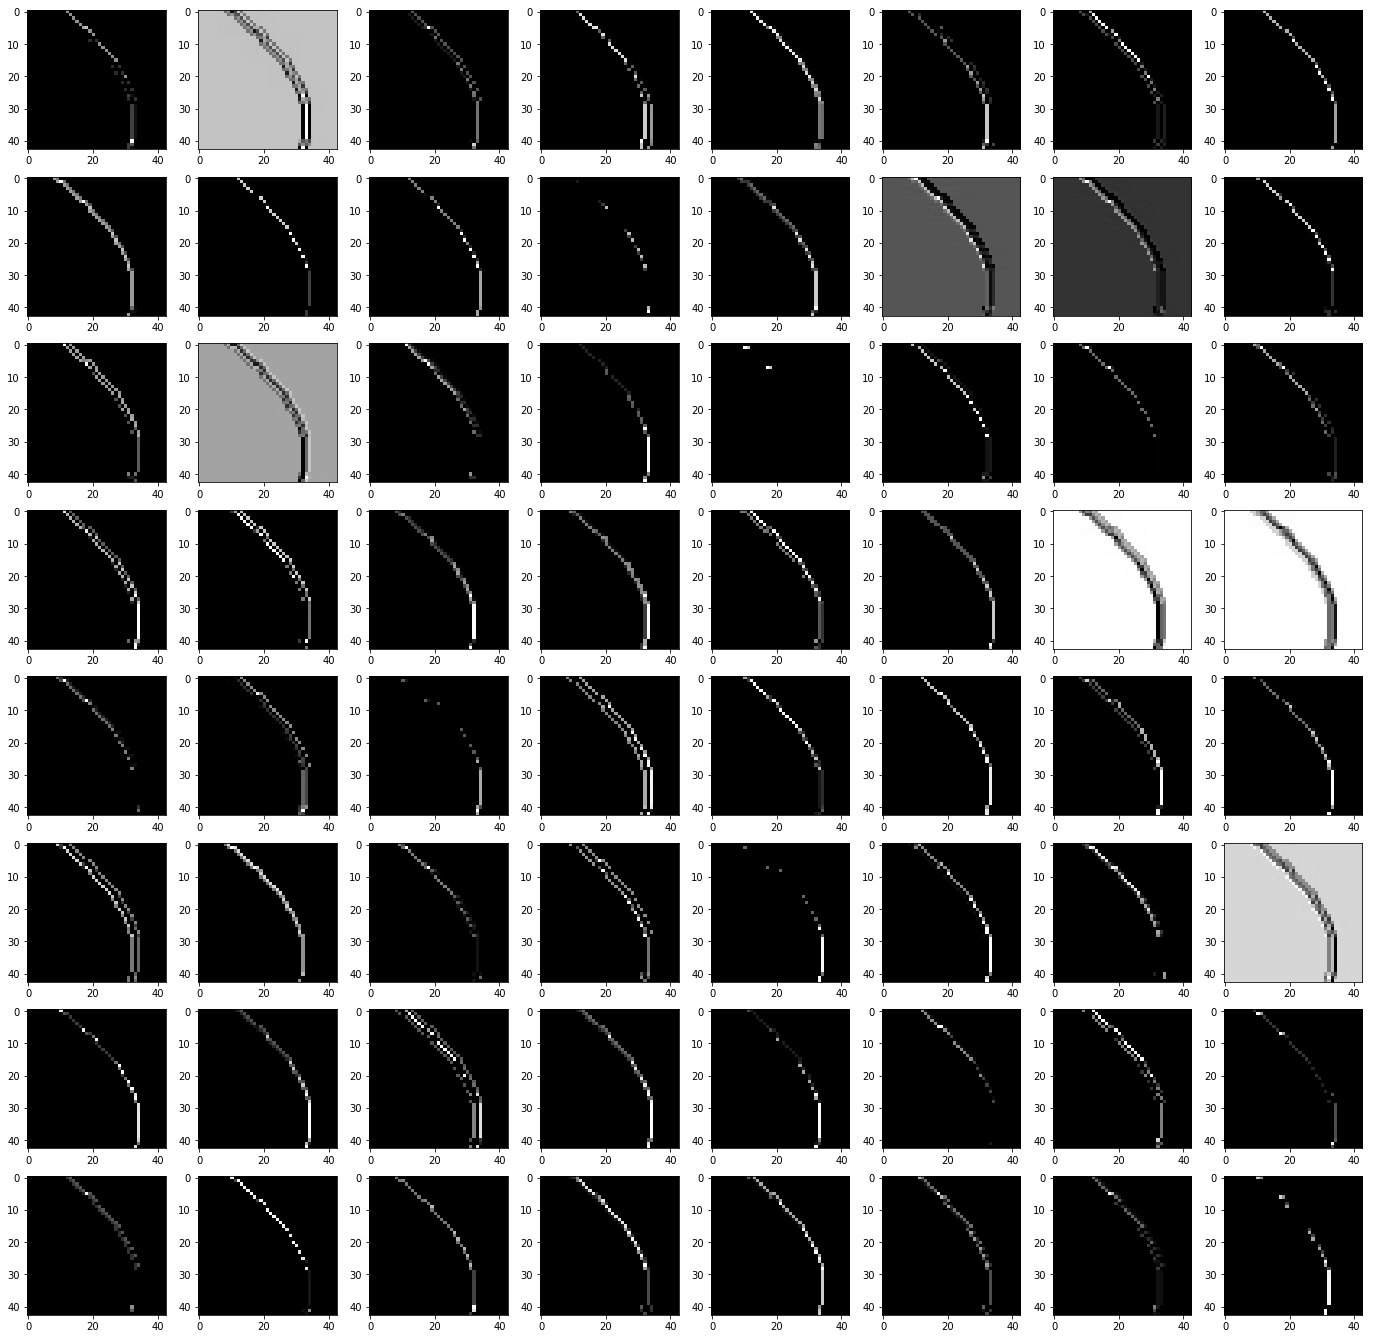

In [2]:
dataToShow = X_test[1]
activations = activation_model.predict(dataToShow.reshape(1,45,45,1))
plt.imshow(dataToShow[:,:,0]);
display_activation(activations, 8, 8, 0)

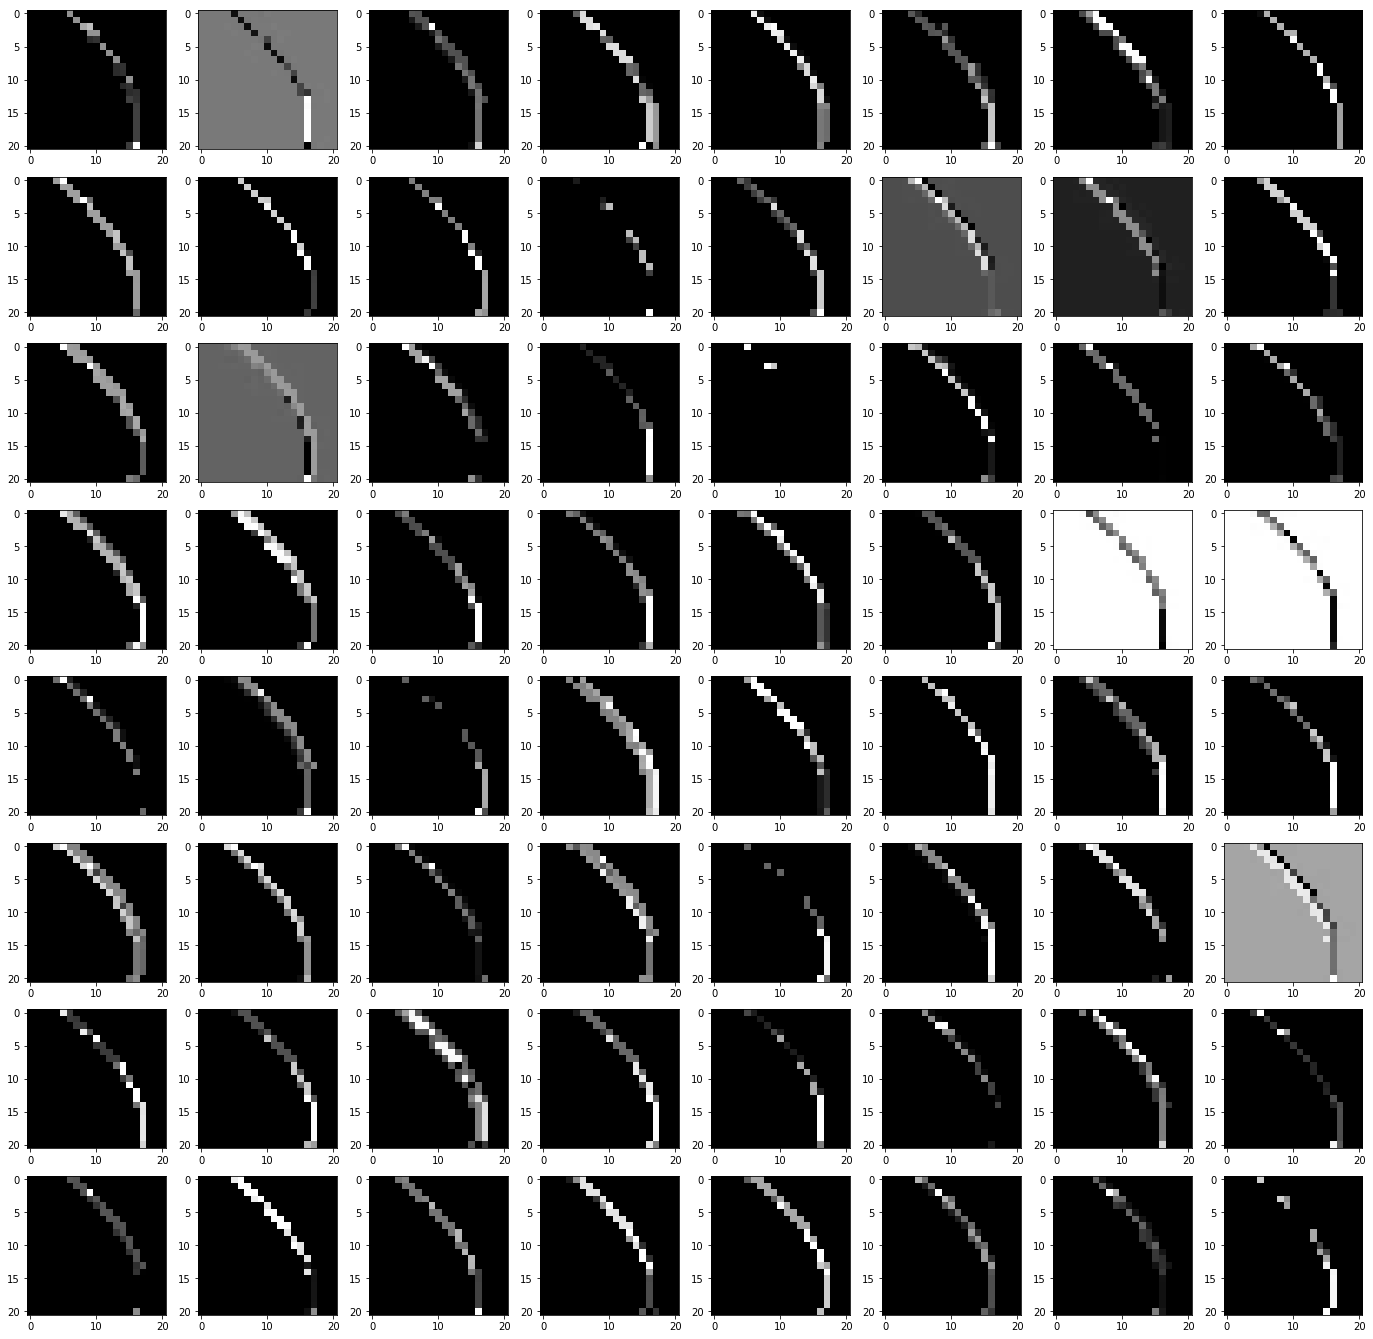

In [3]:
display_activation(activations, 8, 8, 1)

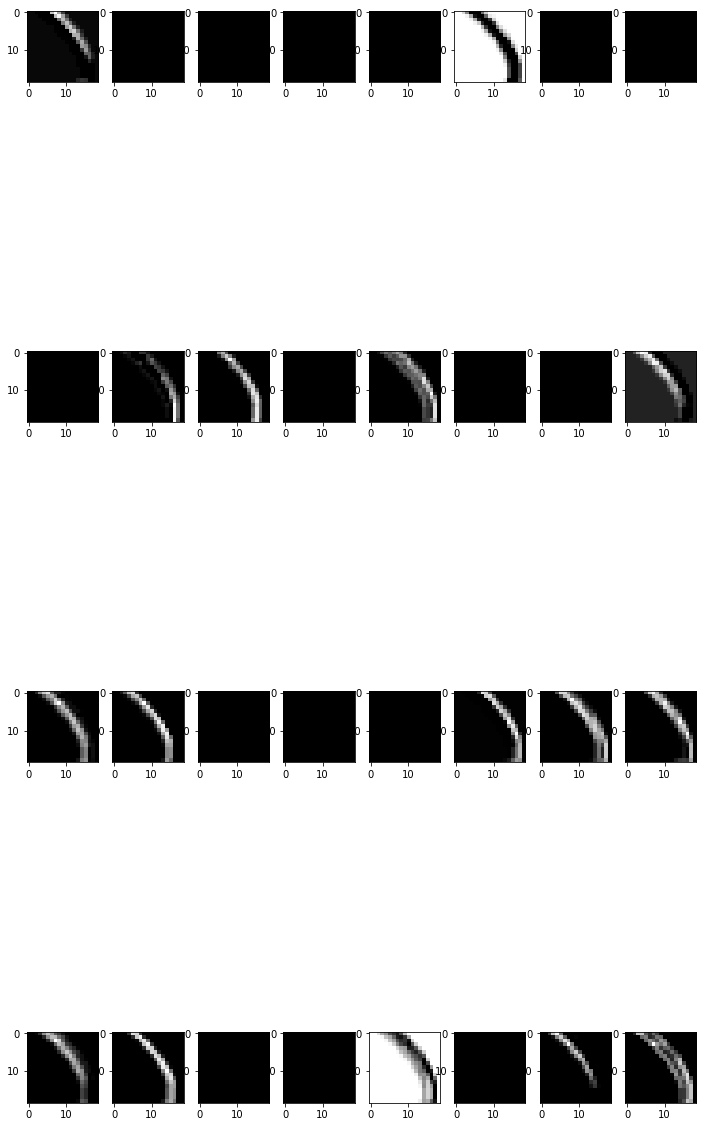

In [4]:
display_activation(activations, 8, 4, 2)

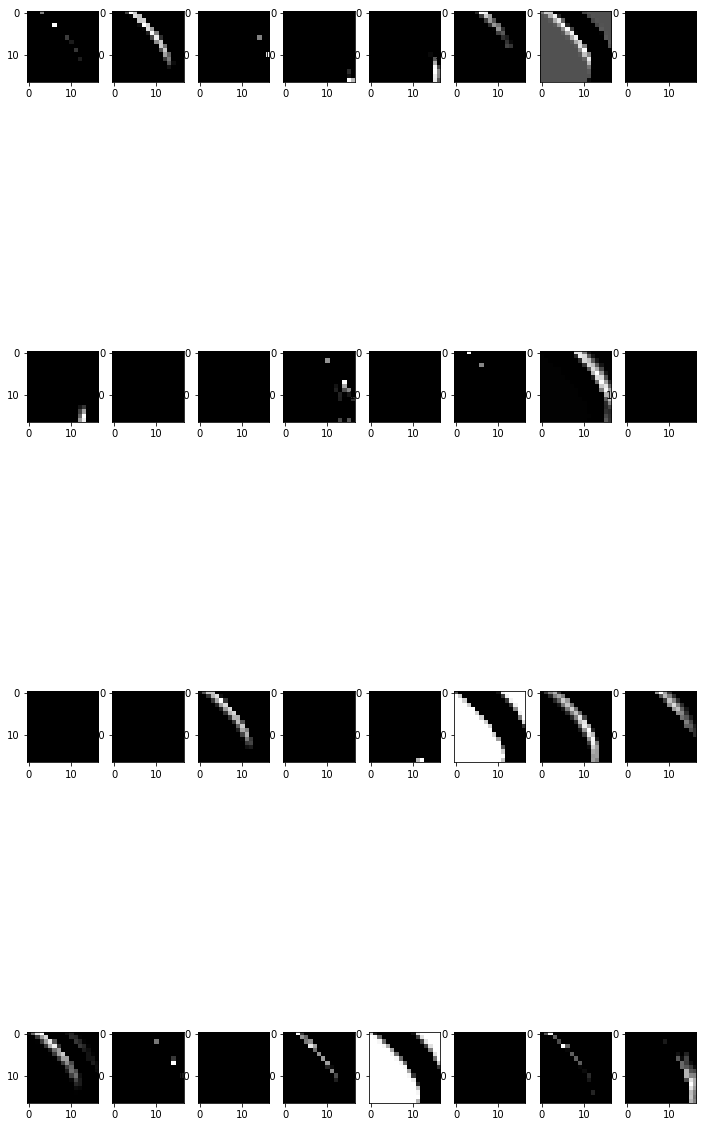

In [5]:
display_activation(activations, 8, 4, 3)